In [2]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

visualize:

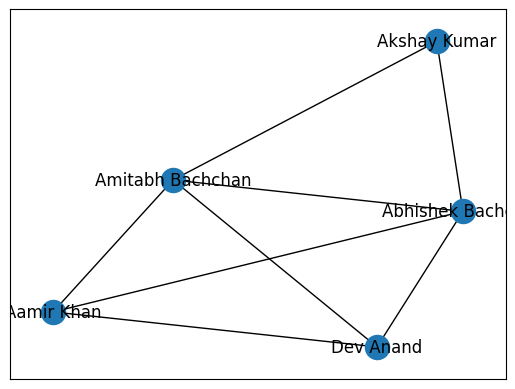

In [3]:
nx.draw_networkx(G_symmetric)

Asymmetric:

In [4]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

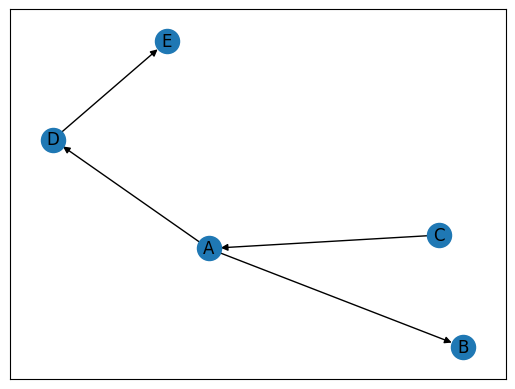

In [5]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)


Use the layout command to add clarity

In [6]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=250)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=10)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=10)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=10)

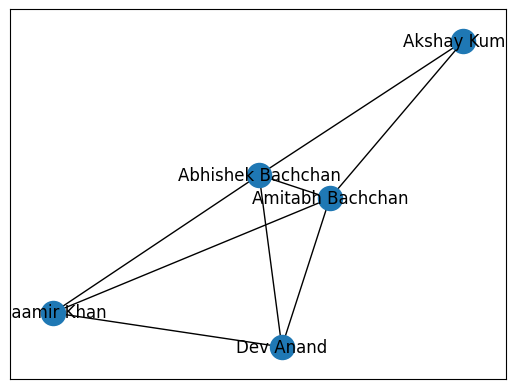

In [7]:
#nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

Here we can see the weights being represented by default by the spatial proximity of the points

In [8]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')


0

In [9]:
nx.degree(G_symmetric, 'Dev Anand')


3

In [10]:
nx.average_clustering(G_symmetric)


0.8666666666666666

Local CLustering Coefficient: Fraction of pairs of the node's friends that are connected to each other.

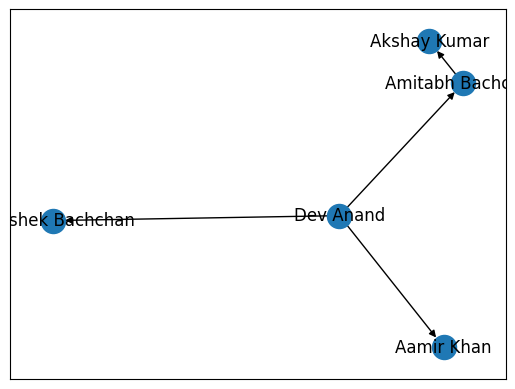

In [11]:
T = nx.bfs_tree(G_symmetric, 'Dev Anand')
nx.spring_layout(T)
nx.draw_networkx(T)

In [12]:
import matplotlib.pyplot as plt

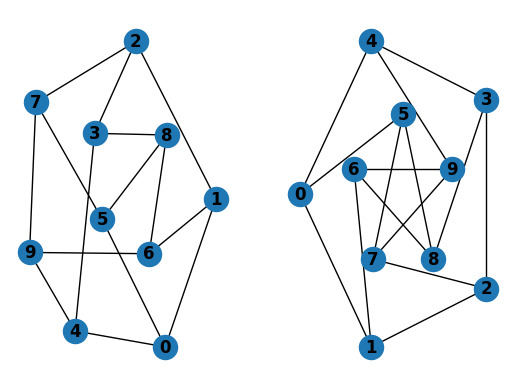

In [13]:
G = nx.petersen_graph()

subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

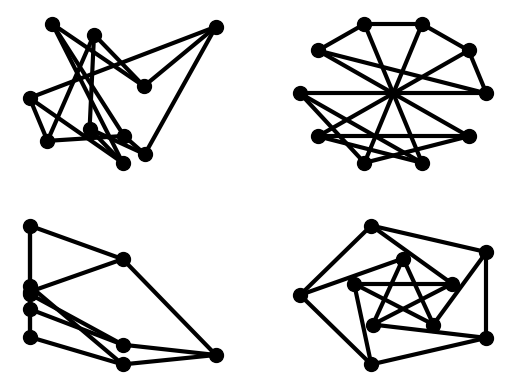

In [15]:
options = {

    'node_color': 'black',

    'node_size': 100,

    'width': 3,

}

subax1 = plt.subplot(221)

nx.draw_random(G, **options)

subax2 = plt.subplot(222)

nx.draw_circular(G, **options)

subax3 = plt.subplot(223)

nx.draw_spectral(G, **options)

subax4 = plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [50]:
# Built-in libraries
import os
import sys
import glob
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from tqdm import tqdm
from datetime import datetime, timedelta
from PIL import Image, ImageDraw, ImageFont

# Makerspace libraries
if os.path.isfile('./makerspace.py'): from makerspace import *
#
# else: from helpers.makerspace import *


##############
# timestamps #
##############

def return_unix_time(curr_time, scale=1000):
    ''' converts a string value into a unix timestamp (millisecond) 
        this code works for the following formats:
            - 2022-03-05 12:42:40.133000-05:00
            - 2022-03-23T14:59:56.533Z '''
    if 'T' in curr_time: curr_time = curr_time.replace('T', ' ')
    if 'Z' in curr_time: curr_time = curr_time.replace('Z', '')
    if '-05:00' in curr_time: curr_time = curr_time.replace('-05:00', '') 
    try:    
        curr_time = datetime.strptime(curr_time, "%Y-%m-%d %H:%M:%S.%f")
        return int(curr_time.timestamp() * scale)
    except Exception as e:
        curr_time = datetime.strptime(curr_time, "%Y-%m-%d %H:%M:%S")
        return int(curr_time.timestamp() * scale)

def add_unix_time_to_df(df, scale='millisecond'): 
    ''' add a column  that represents the unix time of a dataframe '''
    multiplier = 1
    if scale == 'millisecond': multiplier = 1000
    df['unix'] = df.apply(lambda x: return_unix_time(x['timestamp'],scale=multiplier), axis=1)

def which_hour(curr_time):
    ''' converts a string value into a unix timestamp (millisecond) 
        this code works for the following formats:
            - 2022-03-05 12:42:40.133000-05:00
            - 2022-03-23T14:59:56.533Z '''
    if 'T' in curr_time: curr_time = curr_time.replace('T', ' ')
    if 'Z' in curr_time: curr_time = curr_time.replace('Z', '')
    if '-05:00' in curr_time: curr_time = curr_time.replace('-05:00', '') 
    try:    
        curr_time = datetime.strptime(curr_time, "%Y-%m-%d %H:%M:%S.%f")
        return curr_time.hour
    except Exception as e:
        curr_time = datetime.strptime(curr_time, "%Y-%m-%d %H:%M:%S")
        return curr_time.hour

def add_hour_to_df(df):
    df['hour'] = df.apply(lambda x: which_hour(x['timestamp']), axis=1)

def convert_datetime(time_str):
  time_zone = time_str.split('-')[-1]
  time_zone = time_zone.split(':')[0] + time_zone.split(':')[1]
  time_date = time_str.split(' ')[0]
  time_time = time_str.split(' ')[1].split('-')[0]
  reformat_time = '{} {} -{}'.format(time_date,time_time,time_zone)

  try:
    return datetime.strptime(reformat_time, '%Y-%m-%d %H:%M:%S.%f %z')
  except:
    return datetime.strptime(reformat_time, '%Y-%m-%d %H:%M:%S %z')

def obtain_target_times(in_df_student,in_every_sec_freq):
  
  # obtain starting df_freq
  df_freq = in_df_student.copy()
  df_freq.sort_values(by=['timestamp'],inplace=True)
  df_freq.reset_index(inplace=True,drop=True)

  # obtain start_time, end_time and first target_time
  start_time = df_freq.at[0,'timestamp']
  end_time = df_freq.at[len(df_freq)-1,'timestamp']
  target_time = start_time + timedelta(seconds=in_every_sec_freq)

  # obtain target_times
  target_times = [start_time]

  def determine_time_diff(input_time):
    return (input_time - target_time).total_seconds()

  while target_time < end_time:
    df_freq['time_diff'] = df_freq['timestamp'].apply(determine_time_diff)
    df_freq = df_freq[df_freq['time_diff']>=0]
    potential_time = df_freq.at[df_freq['time_diff'].idxmin(),'timestamp']
    if (potential_time - target_time).total_seconds() < in_every_sec_freq:
      target_times.append(potential_time)
    
    target_time = target_time + timedelta(seconds=in_every_sec_freq)

  return target_times

############
# calendar #
############

def add_events(df, cohort): 
    ''' indicate when we had office hours or lab sections '''
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df['office'] = df['datetime'].apply(lambda x: cohort.is_office(x))
    df['section'] = df['datetime'].apply(lambda x: cohort.is_section(x))


########################
# Self-touch behaviors #
########################

def add_self_touch(df, threshold=0.1):
    ''' creates a new column called "self_touch" that indicates if the person
        touched his/her face with his/her hand (1) or not (0) for each row '''
    
    df['self_touch'] = df.apply(lambda x: min(
         dist_two_points_3d((x['nose_x'],x['nose_y'],x['nose_z']), 
                            (x['left_wrist_x'],x['left_wrist_y'],x['left_wrist_z'])), 
         dist_two_points_3d((x['nose_x'],x['nose_y'],x['nose_z']), 
                            (x['right_wrist_x'],x['right_wrist_y'],x['right_wrist_z']))), 
    axis=1)
    
    df['self_touch'] = df['self_touch'].apply(lambda x: 1 if x <= threshold else '')


############
# Movement #
############

def add_movement(df, threshold=5, verbose=False):
    
    # assumes that most people won't be moving
    df['is_moving'] = ''
    
    # keep track of the last position for each person
    positions = {}

    # go through the data using numpy arrays
    persons = df['person_identity'].to_numpy()
    nosex = df['nose_x'].to_numpy()
    nosey = df['nose_y'].to_numpy()
    time = df['datetime']

    # go through the data
    #for i in range(0,df.shape[0]-1):
    for i,v in time.items():

        # get the current time
        curr_time = time[i]
        if type(curr_time) == str: 
            curr_time = datetime.strptime(time[i], "%Y-%m-%d %H:%M:%S")
        person = persons[i]
        if np.isnan([nosex[i],nosey[i]]).any(): continue
        nose = transform_coordinates(nosex[i],nosey[i])

        # check if this person exists
        if person in positions.keys():
            prev_nose = positions[person][1]
            prev_time = positions[person][0]
            if abs(curr_time - prev_time).total_seconds() <= 1:
                dist = dist_two_points(nose,prev_nose)
                df.at[i,'move_dist'] = dist
                if dist < threshold: df.at[i,'is_moving'] = 1

        # update the last seen position
        positions[person] = (curr_time,nose)

        # print progress
        if i % 10000 == 0 and verbose:
            sys.stdout.write("\r")
            sys.stdout.write(str(i) + "/"+str(df.shape[0]))
            sys.stdout.flush()

        
def add_joint_movement(df, joint):
    
    # assumes that most people won't be moving
    df[joint+'_movement'] = ''
    
    # keep track of the last position for each person
    positions = {}

    # go through the data using numpy arrays
    persons = df['person_identity'].to_numpy()
    joint_x = df[joint+'_x'].to_numpy()
    joint_y = df[joint+'_y'].to_numpy()
    joint_z = df[joint+'_z'].to_numpy()
    time = df['datetime']

    # go through the data
    for i,v in time.items():

        # get the current time
        curr_time = time[i]
        if type(curr_time) == str: 
            curr_time = datetime.strptime(time[i], "%Y-%m-%d %H:%M:%S")
        person = persons[i]
        if np.isnan([joint_x[i],joint_y[i]]).any(): continue
        jointxyz = joint_x[i],joint_y[i],joint_z[i]

        # check if this person exists
        if person in positions.keys():
            prev_joint = positions[person][1]
            prev_time = positions[person][0]
            if abs(curr_time - prev_time).total_seconds() <= 1:
                dist = dist_two_points_3d(jointxyz,prev_joint) * 90
                df.at[i,joint+'_movement'] = dist

        # update the last seen position
        positions[person] = (curr_time,jointxyz)
       


            
def add_two_joints_movement(df, joint1, joint2):
    
    # find joint name
    joint_name = joint1.replace('right_','').replace('left_','')
    df[joint_name+'_movement'] = ''
    
    # keep track of the last position for each person
    positions = {}

    # go through the data using numpy arrays
    persons = df['person_identity'].to_numpy()
    lx,ly,lz = df[joint1+'_x'].to_numpy(),df[joint1+'_y'].to_numpy(),df[joint1+'_z'].to_numpy()
    rx,ry,rz = df[joint2+'_x'].to_numpy(),df[joint2+'_y'].to_numpy(),df[joint2+'_z'].to_numpy()
    time = df['datetime']

    # go through the data
    for i,v in time.items():

        # get the current time
        curr_time = time[i]
        if type(curr_time) == str: 
            curr_time = datetime.strptime(time[i], "%Y-%m-%d %H:%M:%S")
        person = persons[i]
        if np.isnan([lx[i],ly[i],lz[i],rx[i],ry[i],rz[i]]).any(): continue
        l = lx[i],ly[i],lz[i]
        r = rx[i],ry[i],rz[i]

        # check if this person exists
        if person in positions.keys():
            prev_l,prev_r = positions[person][1],positions[person][2]
            prev_time = positions[person][0]
            if abs(curr_time - prev_time).total_seconds() <= 1:
                dist = dist_two_points_3d(l,prev_l)+dist_two_points(r,prev_r)
                df.at[i,joint_name+'_movement'] = dist * 90

        # update the last seen position
        positions[person] = (curr_time,l,r)
    
        
########################
# social Interactions  #
########################

def add_social_interactions(df, threshold=100, verbose=False):
    ''' add two columns: 'is_with', which indicates someone that the person is close to;
        and 'is_oriented_toward', which indicates someone who is close and where 
        their lines of sight (orthogonal from shoulders to nose) intersect'''

    # go through the data using numpy arrays
    persons = df['person_identity'].to_numpy()
    lshoulderx = df['left_shoulder_x'].to_numpy()
    lshouldery = df['left_shoulder_y'].to_numpy()
    rshoulderx = df['right_shoulder_x'].to_numpy()
    rshouldery = df['right_shoulder_y'].to_numpy()
    nosex = df['nose_x'].to_numpy()
    nosey = df['nose_y'].to_numpy()
    time = df['datetime'].to_numpy()

    # go through the data
    for i in range(0,df.shape[0]-1):

        # get the data
        t = time[i]
        if np.isnan([nosex[i],nosey[i]]).any(): continue
        hx = (lshoulderx[i]+rshoulderx[i])/2.0
        hy = (lshouldery[i]+rshouldery[i])/2.0
        head = transform_coordinates(hx,hy)
        nose = transform_coordinates(nosex[i],nosey[i])

        # check the next entries
        j = i+1
        while(time[j] == time[i] and j < df.shape[0]-1):

            # check if we have data
            if not np.isnan([nosex[j],nosey[j]]).any(): 
                nosej = transform_coordinates(nosex[j],nosey[j])
                
                # close proximity
                if dist_two_points(nose,nosej) < threshold: 
                    
                    # create a column to keep track of the other person
                    df.at[i,'is_with'] = persons[j]

                    # check body orientation
                    hxj = (lshoulderx[j]+rshoulderx[j])/2.0
                    hyj = (lshouldery[j]+rshouldery[j])/2.0
                    headj = transform_coordinates(hxj,hyj)
                    gaze1 = compute_gaze(head,nose)
                    gaze2 = compute_gaze(headj,nosej)
                    if intersect(gaze1,gaze2) != None: 
                        df.at[i,'is_oriented_toward'] = persons[j]

                    
            # check the next row
            j += 1

        # print progress
        if i % 10000 == 0 and verbose:
            sys.stdout.write("\r")
            sys.stdout.write(str(i) + "/"+str(df.shape[0]))
            sys.stdout.flush()

In [69]:
df = pd.read_csv('2022-04-25.csv')
df.head()
from augment_df import *
#add_social_interactions(df, threshold=100, verbose=True)
df[['person_identity','is_with']].head()



,person_identity,is_with
0,melissa,conner
1,conner,melissa
2,conner,melissa
3,rachel,conner
4,rachel,conner


   person_identity  is_with  counts
0            chali   conner       3
1            chali   daniel      12
2            chali  natalie    1624
3            chali   rachel      11
4            chali     rhea       8
..             ...      ...     ...
86            yani    ji su    1833
87            yani     juan     407
88            yani  natalie       5
89            yani     rhea       1
90            yani     sara       5

[91 rows x 3 columns]


C:\Users\louis\AppData\Local\Temp\ipykernel_10536\752786177.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min(d.values()),vmax=max(d.values())),cmap=cmap), cax=None, extend='both', orientation='vertical', label = 'Degree of Nodes')
C:\Users\louis\AppData\Local\Temp\ipykernel_10536\752786177.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar2 = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min([e[2]['counts'] for e in G.ed

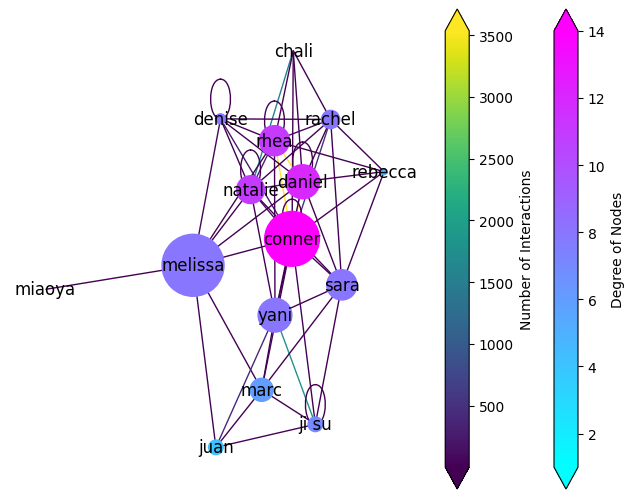

In [115]:
Data = open('2022-04-25.csv', "r")
from matplotlib.colors import ListedColormap
next(Data, None)  # skip the first line in the input file

dat = pd.read_csv('2022-04-25.csv')
grouped_data=dat.groupby(['person_identity','is_with']).size().reset_index(name='counts')
print(grouped_data)
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(grouped_data, create_using=Graphtype, source='person_identity', target='is_with', edge_attr='counts')
btc = nx.betweenness_centrality(G)
cmap = plt.get_cmap('cool')
cmap2 = plt.get_cmap('viridis')
d = dict(nx.degree(G))
nx.spring_layout(G)
nx.draw(G, node_size=[v * 10000 for v in btc.values()], cmap = cmap, vmin = min(d.values()), vmax = max(d.values()), node_color=[v for v in d.values()], edge_cmap = cmap2, edge_color = [e[2]['counts'] for e in G.edges(data=True)], with_labels=True, edge_vmin = min([e[2]['counts'] for e in G.edges(data=True)]), edge_vmax = max([e[2]['counts'] for e in G.edges(data=True)]), width = 1)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min(d.values()),vmax=max(d.values())),cmap=cmap), cax=None, extend='both', orientation='vertical', label = 'Degree of Nodes')
cbar2 = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min([e[2]['counts'] for e in G.edges(data=True)]),vmax=max([e[2]['counts'] for e in G.edges(data=True)])),cmap=cmap2), cax=None, extend='both', orientation='vertical', label = 'Number of Interactions')

In [ ]:
print(nx.prominent_group(G,2))
print(nx.prominent_group(G,3))
print(nx.prominent_group(G,4))
print(nx.prominent_group(G,5))

(0.35, ['melissa', 'conner'])
(0.46, ['melissa', 'conner', 'yani'])
(0.58, ['conner', 'melissa', 'yani', 'sara'])
(0.64, ['conner', 'melissa', 'sara', 'yani', 'rhea'])


In [ ]:
nx.betweenness_centrality(G)

{'melissa': 0.19904619190333475,
 'conner': 0.15530421958993387,
 'rachel': 0.01721611721611722,
 'sara': 0.04729318300746872,
 'rhea': 0.04697445411731126,
 'juan': 0.010989010989010988,
 'marc': 0.02756053470339184,
 'denise': 0.005180533751962323,
 'ji su': 0.011077018219875364,
 'miaoya': 0.0,
 'yani': 0.05901955187669474,
 'daniel': 0.05979496693782408,
 'rebecca': 0.0018315018315018315,
 'natalie': 0.04003139717425432,
 'chali': 0.0}

In [ ]:
nx.second_order_centrality(G)

{'melissa': 21.597679505669365,
 'conner': 15.518081954129908,
 'rachel': 22.794746781873926,
 'sara': 22.04968981350469,
 'rhea': 20.534652770864355,
 'juan': 35.412756957243786,
 'marc': 27.393588424180894,
 'denise': 26.953682253604157,
 'ji su': 31.20359277686331,
 'miaoya': 73.46060005220214,
 'yani': 22.09660389678162,
 'daniel': 18.869607747107047,
 'rebecca': 30.29041449030234,
 'natalie': 20.363585281129183,
 'chali': 30.461955262503327}

In [ ]:
nx.voterank(G,4)

['conner', 'daniel', 'rhea', 'natalie']